# Simulation 01

# Built-in R functions - Inverse cdf method - Intro Stan

# Josep Fortiana  2022-02-28

***
###### LaTeX macros
$\def\prob{P}$
$\def\borel{\operatorname{Borel}}$
$\def\cE{\cal E}$
$\def\cP{\cal P}$
$\def\R{\mathbb{R}}$ 
$\def\N{\mathbb{N}}$
$\def\Z{\mathbb{Z}}$
$\def\Ee{\operatorname{E}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\binomdist{\operatorname{Binom}}$
$\def\berndist{\operatorname{Ber}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\normaldist{\operatorname{N}}$
$\def\unifdist{\operatorname{Unif}}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
$\DeclareMathOperator{\indep}{\perp\negthickspace\negthinspace\perp}$
***

# Exercise 01

Design and write the code for a generator of random numbers for the $\mbox{Exp}(\lambda)$ distribution based on the inverse cdf transformation method.

# Solution 01

1. Compute the quantile function $Q(y)=F^{-1}(y)$:
$$
		{\renewcommand{\arraystretch}{1.2}\begin{array}{lcl}
		F(x)		&=	&1-\exp(-\lambda\,x)=y,\\
		1-y			&=	&\exp(-\lambda\,x),\\
		\log(1-y)	&=	&-\lambda\,x,\\
		x			&=	&-\dfrac{1}{\lambda}\,\log(1-y).
		\end{array}}%
$$

2. Code for a function to compute random numbers following the $\mbox{Exp}(\lambda)$ distribution.
```
my.rexp<-function(n,rate=1){
            return(-log(1-runif(n))/rate)
            }
```

3. Compare to the `rexp` function from the R `stats` package.

In [1]:
my.rexp<-function(n,rate=1){
         return(-log(1-runif(n))/rate)
         }

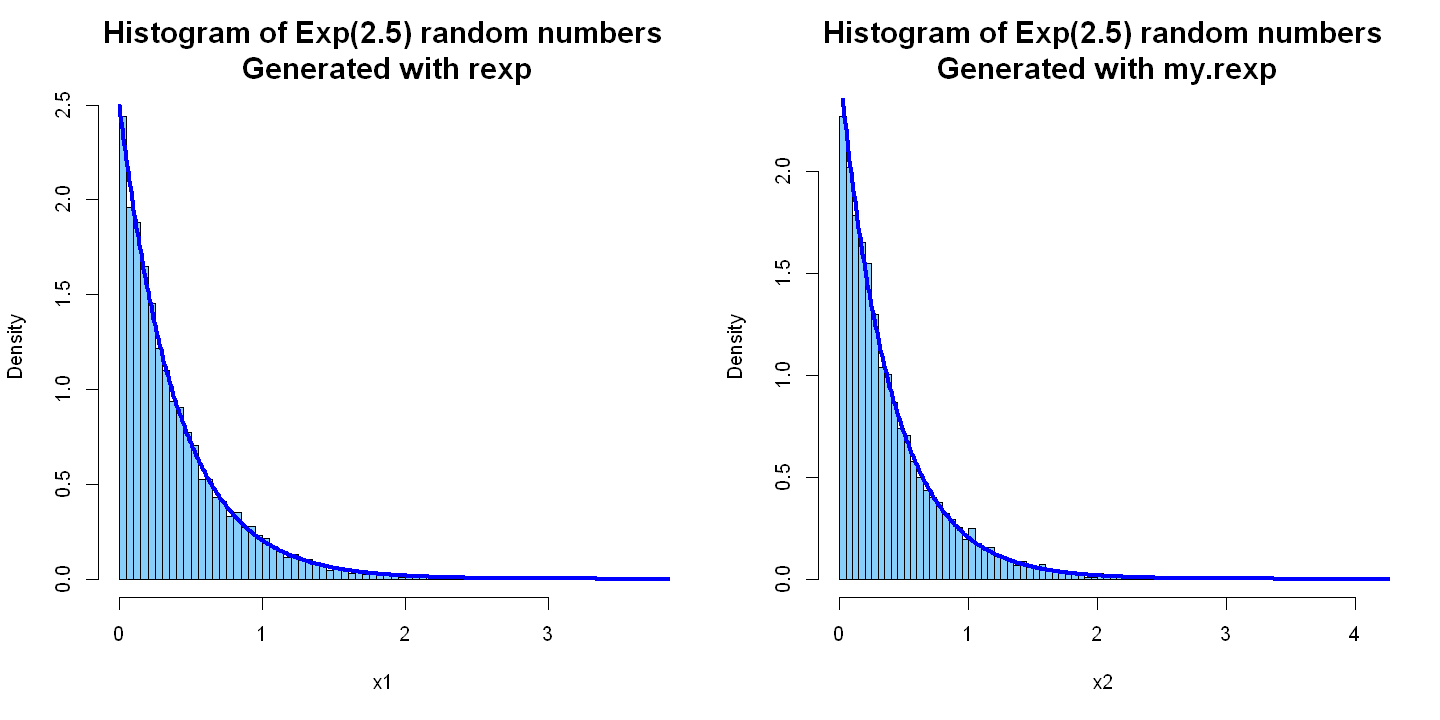

In [2]:
n<-10000
lambda<-2.5
x1<-rexp(n,rate=lambda)
x2<-my.rexp(n,rate=lambda)
options(repr.plot.width=12,repr.plot.height=6)
old.par<-par(mfrow=c(1,2))
u<-seq(0,2*lambda,length=500)
hist(x1, freq=FALSE,nclass=60,main=sprintf("Histogram of Exp(%2.1f) random numbers\n Generated with rexp",lambda),col="LightSkyBlue",cex.main=1.5 )
lines(u,dexp(u,rate=lambda),lwd=3.5,col="blue")
hist(x2, freq=FALSE,nclass=60,main=sprintf("Histogram of Exp(%2.1f) random numbers\n Generated with my.rexp",lambda),col="LightSkyBlue",cex.main=1.5 )
lines(u,dexp(u,rate=lambda),lwd=3.5,col="blue")
par(old.par)